<a href="https://colab.research.google.com/github/mouslimdiallo/Detection_Face/blob/main/Detection_visage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import des bibliothèques 
la bibliothèque OpenCV contient un classificateur en cascade pour la detection des visages avec un modèle préentrainé.


In [ ]:
!git clone https://github.com/mouslimdiallo/Detection_Face.git

Cloning into 'Detection_Face'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (24/24), done.


In [ ]:
import cv2
from cv2 import imread
from cv2 import CascadeClassifier
import numpy as np
from cv2 import imread
from cv2 import imshow
from cv2 import waitKey
from cv2 import destroyAllWindows
from cv2 import CascadeClassifier
from cv2 import rectangle
from matplotlib.patches import Rectangle
from matplotlib import pyplot as plt
from matplotlib import pyplot
!pip install mtcnn
from mtcnn.mtcnn import MTCNN
from google.colab.patches import cv2_imshow

     |████████████████████████████████| 2.3 MB 5.4 MB/s 


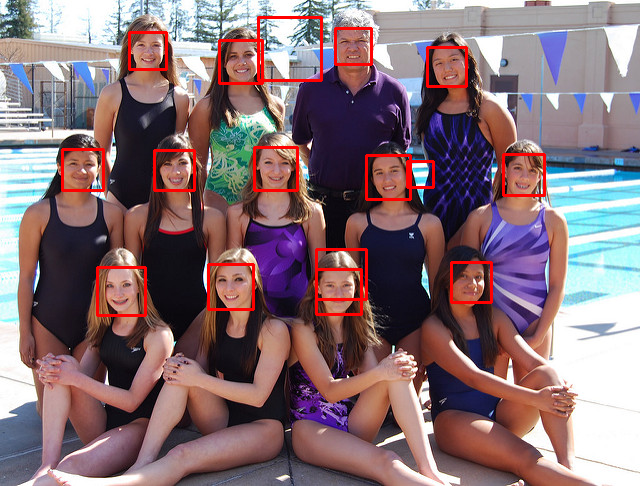

In [ ]:
# Opencv cascade classifier avec la visualisation plot

# Chargement de la photo
pixels = imread('/content/Detection_Face/test2.jpg')
# Charger le model preentrainé que nous avons telecharger.
classifier = CascadeClassifier('/content/Detection_Face/haarcascade_frontalface_default.xml')
# Detection du visage
#Appel de la fonction : detectMultiScale() pour la détection de visage sur une photo (delimitation)

bboxes = classifier.detectMultiScale(pixels, 1.03, 7)


# imprimer le cadre de délimitation pour chaque visage détecté avec la variable box
for box in bboxes:
	# extraction des caracteristiques
	x, y, width, height = box
	x2, y2 = x + width, y + height
	# Dessiner le rectangle avex des pixels
	rectangle(pixels, (x, y), (x2, y2), (0,0,255), 2)
# Montrer le visage, au lieu de : imshow('face detection', pixels) avec l'import cv2imshow
cv2_imshow(pixels)
# keep the window open until we press a key
waitKey(0)
# Fermer la fenetre en appuyant sur une touche
destroyAllWindows()



Correction problème de detection avec la fonction : detectMultiScale() et les arguments scaleFactor et minNeighbors

Voici notre reglace avec scalefactor et minNeighbors, nous remarquons que tous les visages sont detectés mais une arrière plan aussi

In [ ]:
bboxes = classifier.detectMultiScale(pixels, 1.03, 7)

Utilisons d'autres techniques, Le MTCNN peut donner des resultats plus probants avec le DL.

Une analyse en cascade de CNN en 3 etapes avec des réseaux plus profond pour detecter les visages.Voici le processus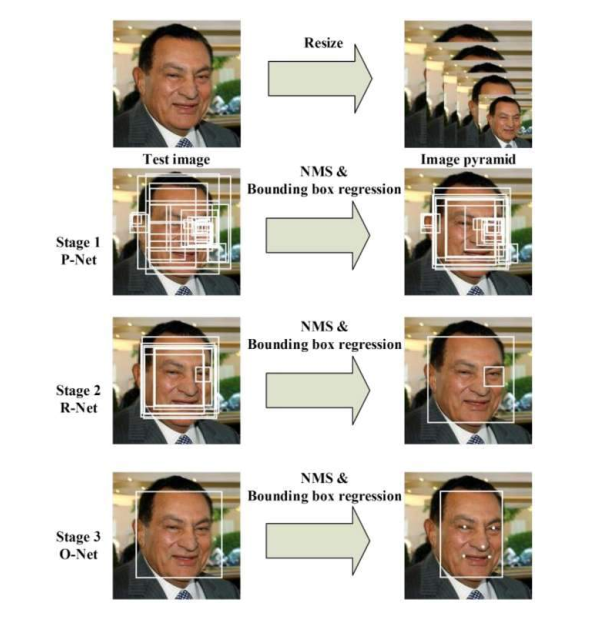  
Source image : https://ichi.pro/fr/mtcnn-reseau-de-convolution-en-cascade-multi-taches-186543706018893

Installation notre biblio préentrainté mtcnn avec pip

In [ ]:
# commande installation
!pip install mtcnn
# on peut verifier la version par ceci
!pip show mtcnn
# Source github : https://github.com/jbrownlee/mtcnn

Name: mtcnn
Version: 0.1.1
Summary: Multi-task Cascaded Convolutional Neural Networks for Face Detection, based on TensorFlow
Home-page: http://github.com/ipazc/mtcnn
Author: Iván de Paz Centeno
Author-email: ipazc@unileon.es
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: opencv-python, keras
Required-by: 


In [ ]:
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


Utilisation du modèle Préentrainement MTCNN

In [ ]:
# Chargeons l'image dans mtcnn avec filename
filename = '/content/Detection_Face/test2.jpg'
pixels = pyplot.imread(filename)
# creation du detecteur de visage
detector = MTCNN()
# detection du visage dans l'image avec la foncton detectface
faces = detector.detect_faces(pixels)
for face in faces:
	print(face)

{'box': [320, 268, 31, 42], 'confidence': 0.9999721050262451, 'keypoints': {'left_eye': (330, 286), 'right_eye': (345, 285), 'nose': (339, 296), 'mouth_left': (331, 301), 'mouth_right': (345, 301)}}
{'box': [226, 39, 30, 41], 'confidence': 0.9999593496322632, 'keypoints': {'left_eye': (233, 56), 'right_eye': (248, 55), 'nose': (241, 63), 'mouth_left': (234, 70), 'mouth_right': (249, 69)}}
{'box': [373, 155, 32, 44], 'confidence': 0.9999196529388428, 'keypoints': {'left_eye': (380, 173), 'right_eye': (394, 171), 'nose': (387, 181), 'mouth_left': (382, 188), 'mouth_right': (396, 186)}}
{'box': [432, 45, 34, 45], 'confidence': 0.9998043179512024, 'keypoints': {'left_eye': (439, 64), 'right_eye': (454, 60), 'nose': (447, 70), 'mouth_left': (443, 78), 'mouth_right': (457, 74)}}
{'box': [133, 30, 30, 40], 'confidence': 0.9997820258140564, 'keypoints': {'left_eye': (141, 45), 'right_eye': (156, 45), 'nose': (148, 53), 'mouth_left': (140, 58), 'mouth_right': (155, 59)}}
{'box': [63, 149, 31, 3

Nous voyons l'extraction de differentes caracteristiques de differents visages(listes) avec plus de précision que le premier modele. box (x, y, largeur et hauteur)

Ici nous avons imprimé chaque visage detecté sous forme de liste. Definissons les rectangles avec nos coordonnées. On va y ajouter une fonction Draw pour dessiner une image avec des boîtes.

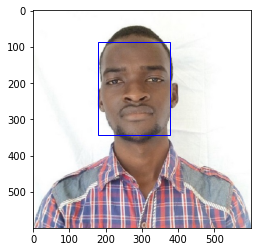

In [ ]:
# Dessiner l'image avec la fonction draw avec 2 parametres
def draw(filename, result_list):
	# charger image
	data = pyplot.imread(filename)
	# visualiser image
	pyplot.imshow(data)
	# Dessin des cases
	ax = pyplot.gca()
	# tracer les cases rectangles
	for result in result_list:
		# Definir les coordonnées
		x, y, width, height = result['box']
		# Tracer les cases avec les coordonnées
		rect = Rectangle((x, y), width, height, fill=False, color='blue')
		# Dessin de la case
		ax.add_patch(rect)
	# Afficher le resultat
	pyplot.show()

filename = '/content/Detection_Face/Mous_DV.jpg'
# Charger le fichier
pixels = pyplot.imread(filename)
# Definir du detecteur
detector = MTCNN()
# detecttion des faces sur les images
faces = detector.detect_faces(pixels)
# Afficher les visages sur l'image d'origine
draw(filename, faces)

Pour dessiner un cercle, ajoutons la fonction Circle pour les yeux, la bouche...

In [ ]:
#import pour la fonction Circle
from matplotlib.patches import Circle

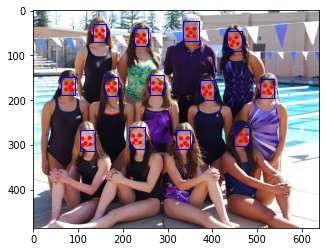

In [ ]:
def draw(filename, result_list):
	data = pyplot.imread(filename)
	pyplot.imshow(data)
	ax = pyplot.gca()
	for result in result_list:
		x, y, width, height = result['box']
		rect = Rectangle((x, y), width, height, fill=False, color='blue')
		ax.add_patch(rect)
		# Faire le dessin des points
		for _, value in result['keypoints'].items():
			# creation des points cercle
			dot = Circle(value, radius=3, color='red')
			ax.add_patch(dot)
	# montrer les traces
	pyplot.show()

filename = '/content/Detection_Face/test2.jpg'
pixels = pyplot.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(pixels)
# Affichage du resultat
draw(filename, faces)

Nous voyons que les visages sont parfaitement detectés avec le modèle MTCNN. Ici nous faisons l'extraction que des visages dans la photo avec la même methode

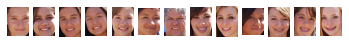

In [ ]:
# l'extraction que des visages dans la photo avec la même methodeN

# La fonction Extract
def Extract(filename, result_list):
	data = pyplot.imread(filename)
	# Boucle for pour le traçage des faces
	for i in range(len(result_list)):
		x1, y1, width, height = result_list[i]['box']
		x2, y2 = x1 + width, y1 + height
		# definir le traçage
		pyplot.subplot(1, len(result_list), i+1)
		pyplot.axis('off')
		# Afficher les traits
		pyplot.imshow(data[y1:y2, x1:x2])
	pyplot.show()

filename = '/content/Detection_Face/test2.jpg'
pixels = pyplot.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(pixels)
Extract(filename, faces)

Bref, nous avons une detection de visage à l'aide d'un modèle preentrainé avec OpenCV.

Nous avons utilisé le classificateur Haarcascade. Nous avons essayé de corriger les imperfections.

Ensuite, pour corriger et faire les reglaces, nous avons utiliser le modèle hyper performant avec MTCNN en 3 étapes

Definitions des traits, analyses listes des caracteristiques de chaque visage, traçage des points, rectanges, cercles à l'aide des coordonnées x, y, width et height.

Resultat performant, manipulation à l'aide de plusieurs photos pour le test.

Prochaine étape : identification des visages dans les images.